In [1]:
import os
print(os.listdir("../input"))

['testX.pickle', 'trainY.pickle', 'trainX.pickle']


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
data=pd.read_pickle("../input/trainX.pickle")
label=pd.read_pickle("../input/trainY.pickle")
test=pd.read_pickle("../input/testX.pickle")

In [4]:
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(set(label))

10

In [7]:
set(label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

9


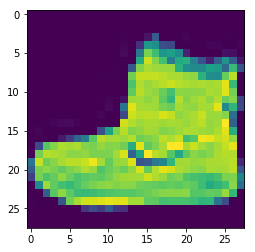

0


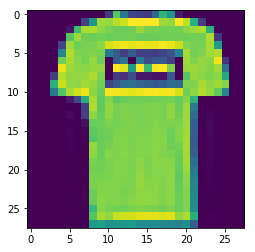

0


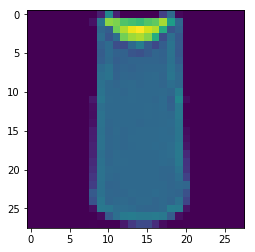

3


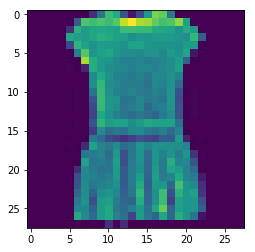

0


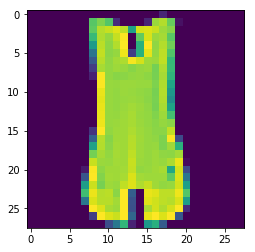

2


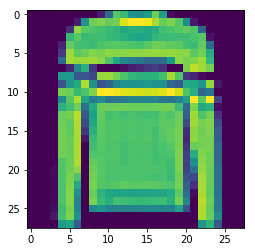

7


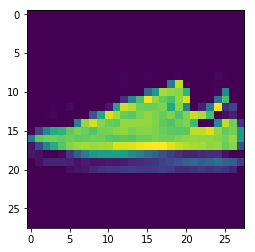

2


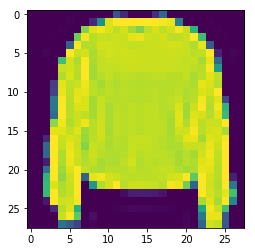

5


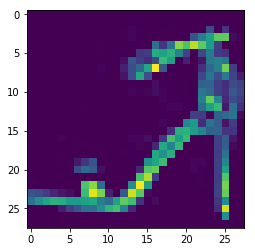

5


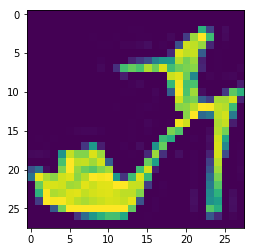

In [8]:
for i in range(10):
    print(label[i])
    plt.imshow(data[i])
    plt.show()

In [9]:
K.image_data_format()

'channels_last'

In [10]:
size=40000
x_train=data[:size]
y_train=label[:size]
x_test=data[size:]
y_test=label[size:]

In [11]:
img_rows,img_cols=28,28

In [12]:
x_train.shape

(40000, 28, 28)

In [13]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [14]:
x_train.shape

(40000, 28, 28, 1)

In [15]:
batch_size=128
num_classes=10
epochs=10

In [16]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape: (40000, 28, 28, 1)
40000 train samples
20000 test samples


In [17]:
x_train=np.reshape(x_train,(size,784))
x_test=np.reshape(x_test,(60000-size,784))

In [18]:
model=Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
__________

In [19]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 116us/step - loss: 0.6965 - acc: 0.7470 - val_loss: 0.5313 - val_acc: 0.7917
Epoch 2/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.4807 - acc: 0.8259 - val_loss: 0.4644 - val_acc: 0.8273
Epoch 3/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.4292 - acc: 0.8438 - val_loss: 0.3969 - val_acc: 0.8518
Epoch 4/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.4044 - acc: 0.8523 - val_loss: 0.3753 - val_acc: 0.8613
Epoch 5/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.3856 - acc: 0.8592 - val_loss: 0.4149 - val_acc: 0.8484
Epoch 6/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.3724 - acc: 0.8638 - val_loss: 0.3879 - val_acc: 0.8544
Epoch 7/10
40000/40000 [==============================] - 1s 32us/step - loss: 0.3541 - acc: 0.8699 - val_loss: 0.3536 - val_ac

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1)

In [22]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [23]:
print(x_train.shape)
print(y_train.shape)

(48000, 28, 28, 1)
(48000,)


In [24]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape: (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [25]:
print(x_train.shape)
print(y_train.shape)

(48000, 28, 28, 1)
(48000, 10)


In [27]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
batch_size = 256
num_classes = 10
epochs = 50
chanDim=-1

# CNN

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [29]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 154us/step - loss: 0.5247 - acc: 0.8244 - val_loss: 0.3459 - val_acc: 0.8744
Epoch 2/50
48000/48000 [==============================] - 3s 73us/step - loss: 0.3273 - acc: 0.8823 - val_loss: 0.2640 - val_acc: 0.9018
Epoch 3/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.2723 - acc: 0.9014 - val_loss: 0.2337 - val_acc: 0.9138
Epoch 4/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.2415 - acc: 0.9118 - val_loss: 0.2348 - val_acc: 0.9151
Epoch 5/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.2256 - acc: 0.9174 - val_loss: 0.2134 - val_acc: 0.9236
Epoch 6/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.2089 - acc: 0.9225 - val_loss: 0.2016 - val_acc: 0.9273
Epoch 7/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.1953 - acc: 0.9286 - val_loss: 0.1951 - val_ac

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22490728691173717
Test accuracy: 0.9444166666666667


In [31]:
print(test.shape)

(10000, 28, 28)


In [32]:
f_test = test.reshape(test.shape[0], *(28, 28, 1))

In [33]:
print(f_test.shape)

(10000, 28, 28, 1)


In [34]:
f_test=f_test.astype('float32')
f_test/=255
print('f_test shape:',f_test.shape)

f_test shape: (10000, 28, 28, 1)


# Predicting on testX.pickle

In [35]:
y_pred = model.predict_classes(f_test)

9


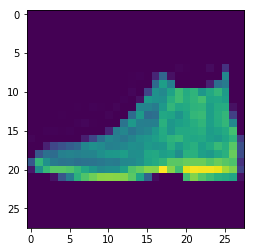

2


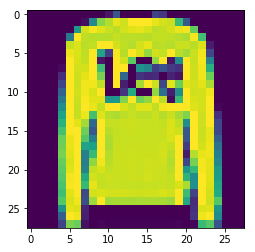

In [36]:
for i in range(2):
    print(y_pred[i])
    plt.imshow(test[i])
    plt.show()

In [37]:
pd.to_pickle(y_pred,"final_answer.pickle")

In [39]:
d=pd.read_pickle("final_answer.pickle")

In [40]:
d[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])